## Importation fo Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle as pk
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,precision_score,recall_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading Breast Cancer dataset

In [2]:
dataset = pd.read_csv('breast-cancer.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df = dataset.copy()

In [4]:
df.diagnosis.value_counts()

B    352
M    206
Name: diagnosis, dtype: int64

In [5]:
df.drop('id',axis=1,inplace=True)

#### Getting the dummy variables from diagnosis

In [6]:
Malignant = pd.get_dummies(df.diagnosis,drop_first=True)

In [7]:
df = pd.concat([df,Malignant],axis=1)
df.drop('diagnosis',axis=1,inplace=True)
df = df.rename(columns={'M':'Malignant'})

In [8]:
X = df[df.drop('Malignant',axis=1).columns]
y = df['Malignant']

#### Splitting the data into Train and Test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
512,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.410,29.66,113.30,844.4,0.15740,0.38560,0.5106,0.20510,0.3585,0.11090
278,13.590,17.84,86.24,572.3,0.07948,0.04052,0.01997,0.01238,0.1573,0.05520,...,15.500,26.10,98.91,739.1,0.10500,0.07622,0.1060,0.05185,0.2335,0.06263
447,14.800,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.02260,0.1893,0.05886,...,16.430,22.74,105.90,829.5,0.12260,0.18810,0.2060,0.08308,0.3600,0.07285
162,19.590,18.15,130.70,1214.0,0.11200,0.16660,0.25080,0.12860,0.2027,0.06082,...,26.730,26.39,174.90,2232.0,0.14380,0.38460,0.6810,0.22470,0.3643,0.09223
555,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,0.06127,...,10.840,34.91,69.57,357.6,0.13840,0.17100,0.2000,0.09127,0.2226,0.08283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.860,26.58,165.90,1866.0,0.11930,0.23360,0.2687,0.17890,0.2551,0.06589
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.2210,0.12940,0.2567,0.05737
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.22100,0.4366,0.20750
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,12.020,25.02,75.79,439.6,0.13330,0.10490,0.1144,0.05052,0.2454,0.08136


In [11]:
Trained_dataset = pd.concat([X_train,y_train],axis=1)
Trained_dataset = Trained_dataset.reset_index(drop=True)

In [12]:
Trained_dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Malignant
0,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,29.66,113.30,844.4,0.15740,0.38560,0.5106,0.20510,0.3585,0.11090,1
1,13.590,17.84,86.24,572.3,0.07948,0.04052,0.01997,0.01238,0.1573,0.05520,...,26.10,98.91,739.1,0.10500,0.07622,0.1060,0.05185,0.2335,0.06263,0
2,14.800,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.02260,0.1893,0.05886,...,22.74,105.90,829.5,0.12260,0.18810,0.2060,0.08308,0.3600,0.07285,0
3,19.590,18.15,130.70,1214.0,0.11200,0.16660,0.25080,0.12860,0.2027,0.06082,...,26.39,174.90,2232.0,0.14380,0.38460,0.6810,0.22470,0.3643,0.09223,1
4,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,0.06127,...,34.91,69.57,357.6,0.13840,0.17100,0.2000,0.09127,0.2226,0.08283,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,26.58,165.90,1866.0,0.11930,0.23360,0.2687,0.17890,0.2551,0.06589,1
442,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,...,24.30,129.00,1236.0,0.12430,0.11600,0.2210,0.12940,0.2567,0.05737,1
443,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.22100,0.4366,0.20750,1
444,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,25.02,75.79,439.6,0.13330,0.10490,0.1144,0.05052,0.2454,0.08136,0


## Checking for imbalance learning Using 
#### Under Sampling Majority Technique

In [13]:
Trained_dataset.Malignant.value_counts()

0    271
1    175
Name: Malignant, dtype: int64

In [14]:
_1 = Trained_dataset[Trained_dataset['Malignant'] == 1].sample(175,random_state=0)
_0 = Trained_dataset[Trained_dataset['Malignant'] == 0].sample(175,random_state=0)
Trained_dataset = pd.concat([_0,_1]).reset_index(drop=True)
DataColumns = Trained_dataset.drop('Malignant',axis=1).columns

### Logistic Regression

In [15]:
Trained_dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Malignant
0,12.430,17.00,78.60,477.3,0.07557,0.03454,0.013420,0.01699,0.1472,0.05561,...,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932,0
1,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,0
2,14.740,25.42,94.70,668.6,0.08275,0.07214,0.041050,0.03027,0.1840,0.05680,...,32.29,107.40,826.4,0.10600,0.13760,0.16110,0.10950,0.2722,0.06956,0
3,11.630,29.29,74.87,415.1,0.09357,0.08574,0.071600,0.02017,0.1799,0.06166,...,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220,0
4,9.755,28.20,61.68,290.9,0.07984,0.04626,0.015410,0.01043,0.1621,0.05952,...,36.92,68.03,349.9,0.11100,0.11090,0.07190,0.04866,0.2321,0.07211,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,19.190,15.94,126.30,1157.0,0.08694,0.11850,0.119300,0.09667,0.1741,0.05176,...,17.81,146.60,1495.0,0.11240,0.20160,0.22640,0.17770,0.2443,0.06251,1
346,17.300,17.08,113.00,928.2,0.10080,0.10410,0.126600,0.08353,0.1813,0.05613,...,25.09,130.90,1222.0,0.14160,0.24050,0.33780,0.18570,0.3138,0.08113,1
347,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,1
348,17.420,25.56,114.50,948.0,0.10060,0.11460,0.168200,0.06597,0.1308,0.05866,...,28.07,120.40,1021.0,0.12430,0.17930,0.28030,0.10990,0.1603,0.06818,1


#### Traditional Prediction Logistic Regression

In [16]:
lrt = LogisticRegression()
lrt.fit(Trained_dataset.drop('Malignant',axis=1),Trained_dataset.Malignant)

LogisticRegression()

In [17]:
TradPred=lrt.predict(X_test)
accuracy_score(y_test,TradPred)

0.9642857142857143

In [18]:
metrics = {'Recall Score':[recall_score(y_test,TradPred)],
'Precision Score':[precision_score(y_test,TradPred)],
'Accuracy Score':[accuracy_score(y_test,TradPred)],
'F1 Score':[f1_score(y_test,TradPred)]}
pd.DataFrame(data = metrics)

,Recall Score,Precision Score,Accuracy Score,F1 Score
0,0.967742,0.909091,0.964286,0.9375


#### Feature selections using Logistic Regression Model

In [19]:
rfe1 = RFE(LogisticRegression(),n_features_to_select=5)
fitted = rfe1.fit(Trained_dataset.drop('Malignant',axis=1),Trained_dataset['Malignant'])
RanksLogistic = fitted.ranking_
LogisticRanks=fitted.ranking_
FTLogistic=pd.concat([Trained_dataset[[DataColumns[i] for i,j in enumerate(RanksLogistic) if j==1]],Trained_dataset['Malignant']],axis=1)

In [20]:
FTLogistic.columns

Index(['radius_mean', 'texture_se', 'radius_worst', 'concavity_worst',
       'concave points_worst', 'Malignant'],
      dtype='object')

In [21]:
FTLogistic.Malignant.value_counts()

0    175
1    175
Name: Malignant, dtype: int64

#### Fitting the logistic regression using the featured dataset

In [22]:
lr = LogisticRegression()
lr.fit(FTLogistic.drop('Malignant',axis=1),FTLogistic['Malignant'])

LogisticRegression()

#### Getting the testing dataset according to the featured selected

In [23]:
def FeatureSelectionLogistic(Dataset,TrainedFeature = ['radius_mean', 'texture_se', 'radius_worst', 'concavity_worst','concave points_worst']):
    return Dataset[TrainedFeature]
X_test_Logistic = FeatureSelectionLogistic(X_test)

#### Predicting the testing dataset and model evaluation

In [24]:
y_predict_logistic = lr.predict(X_test_Logistic)

In [25]:
metrics = {'Recall Score':[recall_score(y_test,y_predict_logistic)],
'Precision Score':[precision_score(y_test,y_predict_logistic)],
'Accuracy Score':[accuracy_score(y_test,y_predict_logistic)],
'F1 Score':[f1_score(y_test,y_predict_logistic)]}
pd.DataFrame(data = metrics)

,Recall Score,Precision Score,Accuracy Score,F1 Score
0,0.967742,0.9375,0.973214,0.952381


<AxesSubplot:>

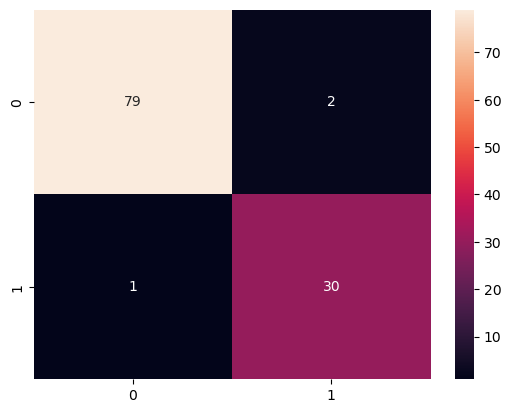

In [26]:
sns.heatmap(confusion_matrix(y_test,y_predict_logistic),annot=True)

#### Deploying the model using pickle

In [27]:
with open('LogisticModel.pkl','wb') as f:
    pk.dump(lr,f)